In [1]:
#importing Libraries
from sklearn.utils import resample

In [2]:
dataset=[10,20,30,40,50,60,70,80,90,100]

In [3]:
#using "resample" function generate a bootstrap sample
boot_samp = resample(dataset, replace=True, n_samples=5, random_state=1)

In [5]:
#extracting OOB sample
OOB=[x for x in dataset if x not in boot_samp]

In [6]:
print(boot_samp)

[60, 90, 100, 60, 10]


In [7]:
print(OOB)

[20, 30, 40, 50, 70, 80]


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#importing our parameter tuning dependencies
from sklearn.model_selection import (cross_val_score, GridSearchCV,StratifiedKFold, ShuffleSplit )
#importing our dependencies for Feature Selection
from sklearn.feature_selection import (SelectKBest, RFE, RFECV)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from collections import defaultdict
# Importing our sklearn dependencies for the modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, auc)

In [16]:
data= pd.read_csv("data.csv")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [18]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [20]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


/home/test/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


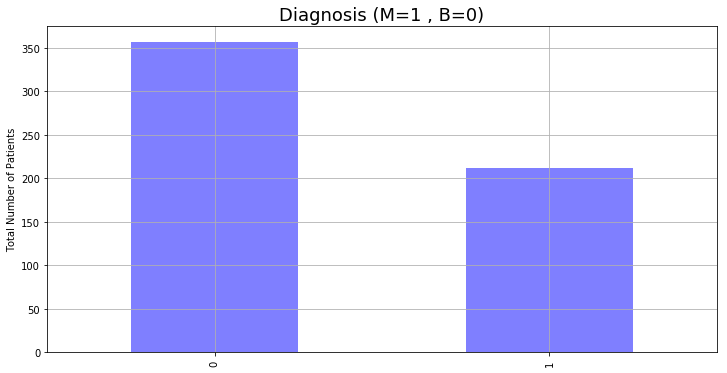

In [21]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']

datas.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")
plt.grid(b=True)

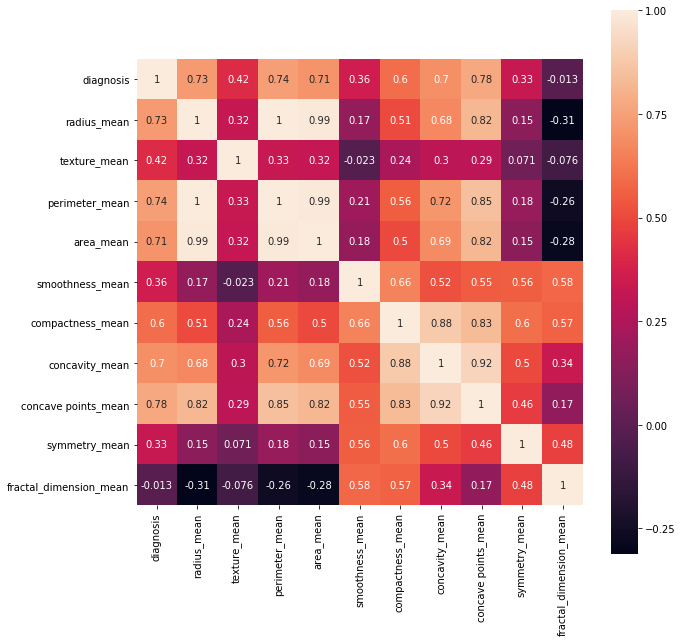

In [22]:
data_mean = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

plt.figure(figsize=(10,10))
foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True)

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
predictors = data_mean.columns[2:11]
target = "diagnosis"
X = data_mean.loc[:,predictors]
y = np.ravel(data.loc[:,[target]])
# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Shape of training set : %i & Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]) )
print ('There are very few data points so 10-fold cross validation should give us a better estimate')

Shape of training set : 455 & Shape of test set : 114
There are very few data points so 10-fold cross validation should give us a better estimate


In [24]:
param_grid = {'n_estimators': [ 25, 50, 100, 150, 300, 500], "max_depth": [ 5, 8, 15, 25], max_features": ['auto', 'sqrt', 'log2']
             } 
#use OOB samples ("oob_score= True") to estimate the generalization accuracy.
rfc = RandomForestClassifier(bootstrap= True, n_jobs= 1, oob_score= True)
#let's use cv=10 in the GridSearchCV call
#performance estimation
#initiate the grid 
grid = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy')
#fit your data before you can get the best parameter combination.
grid.fit(X,y)
grid.cv_results_

/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The def

{'mean_fit_time': array([0.02466345, 0.04532037, 0.08904536, 0.13262093, 0.26408281,
        0.43760245, 0.02305748, 0.0447917 , 0.08848472, 0.13225682,
        0.26768038, 0.4613445 , 0.02341416, 0.0458374 , 0.0886591 ,
        0.13673623, 0.26346965, 0.43938911, 0.02362089, 0.0460012 ,
        0.09135058, 0.13583868, 0.27109883, 0.45125051, 0.02503822,
        0.04640167, 0.09069285, 0.13544171, 0.27002378, 0.45578334,
        0.02367229, 0.04614353, 0.09081879, 0.13787074, 0.27392855,
        0.45671623, 0.0236553 , 0.04641516, 0.09166059, 0.13611958,
        0.27246521, 0.45574951, 0.02377658, 0.04627681, 0.09178705,
        0.13601613, 0.27151799, 0.45527086, 0.02442377, 0.04796576,
        0.09236736, 0.13790035, 0.27026279, 0.44904189, 0.0234668 ,
        0.04600377, 0.09084218, 0.13521547, 0.27153788, 0.47259834,
        0.02415636, 0.04591112, 0.09126964, 0.13604031, 0.27062907,
        0.45223267, 0.02362571, 0.04584928, 0.09056966, 0.13590467,
        0.27025068, 0.45405843]

In [25]:
# Let's find out the best scores, parameter and the estimator from the gridsearchCV
print("GridSearhCV best model:\n ")
print('The best score: ', grid.best_score_)
print('The best parameter:', grid.best_params_)
print('The best model estimator:', grid.best_estimator_)

GridSearhCV best model:
 
The best score:  0.9490333919156415
The best parameter: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
The best model estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


In [26]:
# model = RandomForestClassifier() with optimal values
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=8, max_features='sqrt', max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
 oob_score=True, random_state=None, verbose=0, warm_start=False)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [27]:
print("Performance Accuracy on the Testing data:", round(model.score(X_test, y_test) *100))

Performance Accuracy on the Testing data: 95.0


In [29]:
#Getting the predictions for X#getting 
y_pred = model.predict(X_test)
print('Total Predictions {}'.format(len(y_pred)))

Total Predictions 114


In [30]:
truth = pd.DataFrame(y_test, columns= ['Truth'])
predictions = pd.DataFrame(y_pred, columns= ['Predictions'])
frames = [truth, predictions]
_result = pd.concat(frames, axis=1)
print(_result.shape)
_result.head()

(114, 2)


,Truth,Predictions
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [31]:
# 10 fold cross-validation with a Tree classifier on the trainning dataset# 10 fold 
#splitting the data, fitting a model and computing the score 10 consecutive times
cv_scores = []
scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
cv_scores.append(scores.mean())
cv_scores.append(scores.std())

#cross validation mean score#cross va 
print("10 k-fold cross validation mean score: ", scores.mean() *100)

10 k-fold cross validation mean score:  92.76328502415458


/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: Use

In [32]:
# printing classification accuracy score rounded
print("Classification accuracy: ", round(accuracy_score(y_test, y_pred, normalize=True) * 100))

Classification accuracy:  95.0


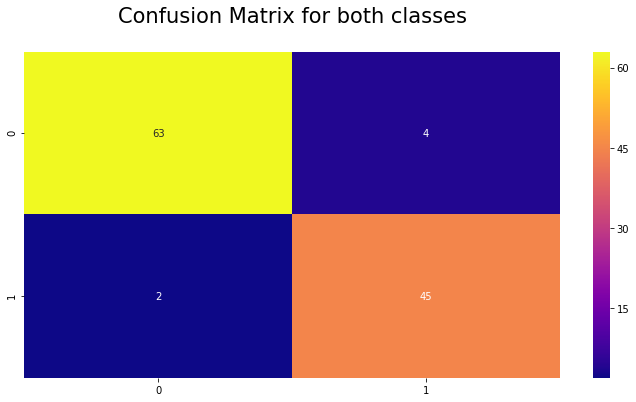

In [34]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Confusion Matrix for both classes\n', size=21)
sns.heatmap(cm, cmap= 'plasma',annot=True, fmt='g') # cmap
plt.show()

In [35]:
# The classification Report
target_names = ['Benign [Class 0]', 'Malignant[Class 1]']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

  Benign [Class 0]       0.97      0.94      0.95        67
Malignant[Class 1]       0.92      0.96      0.94        47

         micro avg       0.95      0.95      0.95       114
         macro avg       0.94      0.95      0.95       114
      weighted avg       0.95      0.95      0.95       114



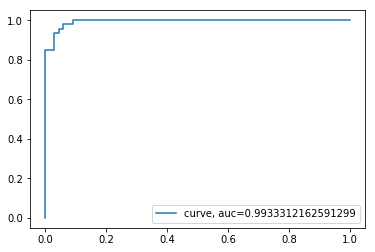

In [36]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [38]:
param_grid = {
 'n_estimators': [ 25, 50, 100, 150, 300, 500], # the more parameters, the more computational expensive
 "max_depth": [ 5, 8, 15, 25],
 "max_features": ['auto', 'sqrt', 'log2'] 
 }
gbm = GradientBoostingClassifier(learning_rate=0.1,random_state=10,subsample=0.8)
#performance estimation
#initiate the grid 
grid = GridSearchCV(gbm, param_grid = param_grid, cv=10, scoring ='accuracy')
#fit your data before you can get the best parameter combination.
grid.fit(X,y)
grid.cv_results_

/home/test/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/test/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/test/anaconda3/lib/python3.6/site-packages/s

{'mean_fit_time': array([0.03357732, 0.06183813, 0.12958674, 0.1783514 , 0.22082019,
        0.2753746 , 0.02565794, 0.0491739 , 0.0963346 , 0.14618645,
        0.20080142, 0.25042105, 0.02569914, 0.0496645 , 0.09734526,
        0.14091222, 0.19273269, 0.25120153, 0.05340505, 0.11228707,
        0.19721208, 0.20616119, 0.24344652, 0.29732413, 0.0499697 ,
        0.10002594, 0.1672663 , 0.1856184 , 0.22748523, 0.28232105,
        0.05002663, 0.10048926, 0.17153428, 0.19214046, 0.2282871 ,
        0.2837091 , 0.06164799, 0.13611865, 0.21797233, 0.23263397,
        0.27355845, 0.32827122, 0.06184452, 0.13691244, 0.2072154 ,
        0.22467904, 0.26327517, 0.31841557, 0.06153889, 0.13675637,
        0.20681479, 0.22172685, 0.26393125, 0.31865675, 0.06144116,
        0.13665109, 0.22121642, 0.23627279, 0.27572894, 0.33008027,
        0.06214786, 0.13857951, 0.21034305, 0.22474611, 0.2658509 ,
        0.32143543, 0.06207702, 0.1384551 , 0.21014974, 0.22484236,
        0.26768396, 0.32130935]

In [39]:
#Let's find out the best scores, parameter and the estimator from the gridsearchCV
print("GridSearhCV best model:\n ")
print('The best score: ', grid.best_score_)
print('The best parameter:', grid.best_params_)
print('The best model estimator:', grid.best_estimator_) 

GridSearhCV best model:
 
The best score:  0.9525483304042179
The best parameter: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150}
The best model estimator: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [40]:
model2 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
 learning_rate=0.1, loss='deviance', max_depth=5,
 max_features='sqrt', max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=150,
 presort='auto', random_state=10, subsample=0.8, verbose=0,
 warm_start=False)
model2.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [41]:
print("Performance Accuracy on the Testing data:", round(model2.score(X_test, y_test) *100))

Performance Accuracy on the Testing data: 96.0


In [43]:
#getting the predictions for X#getting 
y_pred2 = model2.predict(X_test)
print('Total Predictions {}'.format(len(y_pred2)))

Total Predictions 114


In [44]:
truth = pd.DataFrame(y_test, columns= ['Truth'])
predictions = pd.DataFrame(y_pred, columns= ['Predictions'])
frames = [truth, predictions]
_result = pd.concat(frames, axis=1)
print(_result.shape)
_result.head()

(114, 2)


,Truth,Predictions
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [45]:
cv_scores = []

scores2 = cross_val_score(gbm, X_train, y_train, cv=10, scoring='accuracy')
cv_scores.append(scores2.mean())
cv_scores.append(scores2.std())

In [47]:
#cross validation mean score#cross va 
print("10 k-fold cross validation mean score: ", scores2.mean() *100)

10 k-fold cross validation mean score:  95.16425120772946


In [48]:
#printing classification accuracy score rounded
print("Classification accuracy: ", round(accuracy_score(y_test, y_pred2, normalize=True) * 100))

Classification accuracy:  96.0


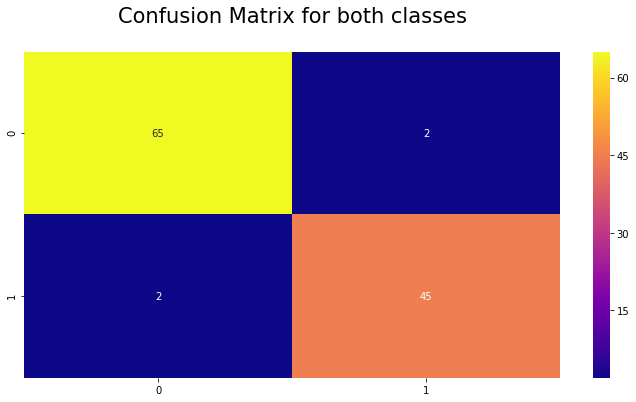

In [49]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Confusion Matrix for both classes\n', size=21)
sns.heatmap(cm, cmap= 'plasma',annot=True, fmt='g') # cmap
plt.show()